### Support Vector Machine (SVM) / Метод Опорных Векторов

Support Vector Machine (SVM) — это мощный и универсальный алгоритм машинного обучения, способный выполнять классификацию, регрессию и даже обнаружение выбросов. Он особенно эффективен в задачах классификации, где его цель — найти оптимальную разделяющую гиперплоскость между классами.

#### Основные концепции

1.  **Разделяющая гиперплоскость (Separating Hyperplane)**: В многомерном пространстве данных гиперплоскость — это линия (в 2D), плоскость (в 3D) или их многомерный аналог, которая разделяет точки данных различных классов.

2.  **Отступ (Margin)**: SVM стремится не просто найти разделяющую гиперплоскость, но и максимизировать отступ — расстояние между гиперплоскостью и ближайшими точками данных каждого класса. Эти ближайшие точки называются **опорными векторами**.

3.  **Опорные векторы (Support Vectors)**: Это точки данных, которые лежат на границе отступа или внутри него. Они играют ключевую роль, поскольку только они влияют на положение и ориентацию разделяющей гиперплоскости. Удаление других точек данных, не являющихся опорными векторами, не изменит гиперплоскость.

#### Идея SVM

Основная идея SVM заключается в поиске гиперплоскости, которая не только разделяет классы, но и делает это с максимально возможным зазором (отступом). Чем больше отступ, тем выше обобщающая способность классификатора, то есть его устойчивость к новым, ранее не встречавшимся данным.

#### Математическая формулировка (Линейный SVM)

Для линейно разделимых классов, гиперплоскость определяется уравнением:

$w^T x + b = 0$

где:
- $w$ — вектор нормали к гиперплоскости.
- $x$ — вектор признаков входных данных.
- $b$ — смещение (свободный член).

Цель SVM — найти $w$ и $b$ таким образом, чтобы минимизировать $||w||$ (или максимизировать $1/||w||$, что эквивалентно максимизации ширины отступа) при условии, что для всех опорных векторов $x_i$ их классификация верна и они находятся за пределами отступа:

$$y_i (w^T x_i + b) \ge 1 \quad \text{для всех } i$$

Где $y_i \in \{-1, +1\}$ — метка класса для $x_i$. Выражение $$M(w,x_i) = y_i(w^T x_i + b)$$ называется **функциональным отступом**. Если $M(w,x_i) \ge 1$, то точка $x_i$ классифицирована корректно и находится за пределами полосы отступа. Большое положительное значение $M(w,x_i)$ указывает на высокую уверенность в классификации и то, что точка находится далеко от разделяющей гиперплоскости.

#### Мягкий отступ (Soft Margin)

На практике данные редко бывают идеально линейно разделимыми. Для таких случаев SVM использует концепцию **мягкого отступа**, допуская некоторую степень неправильной классификации или точек, находящихся внутри отступа. Это достигается введением **переменных ослабления (slack variables)** $\xi_i \ge 0$ и параметра регуляризации $C$:

Задача SVM формулируется как задача **квадратичного программирования (Quadratic Programming - QP)**:

$$
\begin{cases}
\displaystyle \min_{w,b,\{\xi_i\}} \; \frac{1}{2}\lVert w\rVert^2 + C\sum_{i=1}^{n}\xi_i, \\[1.2em]
\text{при условиях:} \\[0.4em]
\quad y_i\big(w^\top x_i + b\big) \ge 1 - \xi_i, \quad i = 1, \dots, n, \\[0.3em]
\quad \xi_i \ge 0, \quad i = 1, \dots, n.
\end{cases}
$$

Первое ограничение можно переписать как $$\xi_i \ge 1 - y_i (w^T x_i + b)\$$

С учетом того, что мы стремимся минимизировать сумму $\sum \xi_i$ где $\xi_i \ge 0$, мы можем объединить эти условия, используя $$\xi_i = \max(0, 1 - y_i (w^T x_i + b))$$ Подставляя это в целевую функцию, получаем более компактную форму:

Минимизировать: $$\frac{1}{2} ||w||^2 + C \sum_{i=1}^n \max(0, 1 - y_i (w^T x_i + b))$$

Эта задача решается с использованием методов квадратичного программирования, часто с применением **условий Кархуна-Куна-Таккера (KKT)**, которые позволяют перейти к двойственной формулировке задачи.

Параметр $C$ контролирует компромисс между максимизацией отступа (минимизацией $||w||^2$) и минимизацией ошибок классификации (минимизацией $\sum \xi_i$). Малое $C$ допускает больший отступ, но больше ошибок, в то время как большое $C$ стремится к меньшим ошибкам, но может привести к меньшему отступу.

#### Оптимальный вектор весов $w$

Одним из ключевых результатов решения двойственной задачи SVM является то, что оптимальный вектор весов $w$ может быть представлен как линейная комбинация обучающих векторов:

#### Оптимальный вектор весов $w$ и классификация объектов

Одним из ключевых результатов решения двойственной задачи SVM является то, что оптимальный вектор весов $w$ может быть представлен как линейная комбинация обучающих векторов:

$w = \sum_{i=1}^N \alpha_i y_i x_i$

Где $\alpha_i$ — это коэффициенты Лагранжа, полученные в результате оптимизации. Только для опорных векторов (точек, лежащих на границе отступа или внутри него) $\alpha_i > 0$. Для остальных точек $\alpha_i = 0$. Это означает, что гиперплоскость определяется только опорными векторами.

Условия Кархуна-Куна-Таккера (KKT) позволяют классифицировать объекты обучающей выборки следующим образом:

$$
\left\{
\begin{aligned}
\lambda_i = 0,\; \xi_i = 0,\; &\; M(w,x_i) > 1
&&\Longrightarrow\; \text{периферийный объект (не влияет на гиперплоскость)}\\[6pt]
0 < \lambda_i < C,\; \xi_i = 0,\; &\; M(w,x_i) = 1
&&\Longrightarrow\; \text{опорный граничный вектор (лежит на отступе)}\\[6pt]
\lambda_i = C,\; \xi_i > 0,\; &\; M(w,x_i) < 1
&&\Longrightarrow\; \text{опорный ошибочный объект (внутри отступа / неправильно классифицирован)}
\end{aligned}
\right.
$$



#### Ядерный трюк (Kernel Trick)

Когда данные не являются линейно разделимыми в исходном пространстве, SVM может использовать **ядерный трюк**. Это позволяет отобразить данные в более высокоразмерное признаковое пространство, где они могут стать линейно разделимыми. Ядерные функции (например, полиномиальное ядро, радиально-базисная функция (RBF) или сигмоидальное ядро) вычисляют скалярное произведение векторов в этом высокоразмерном пространстве без явного построения этого пространства, что делает вычисления эффективными.

$$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$

Где $\phi$ — это функция отображения в новое пространство.

#### Классификация

После обучения SVM, новый объект $x_{new}$ классифицируется путем вычисления знака функции. Подставляя формулу для $w$ в уравнение гиперплоскости, получаем:

$$a(x_{new}) = \operatorname{sign}(w^T x_{new} + b) = \operatorname{sgn}\left(\left(\sum_{i \in SV} \alpha_i y_i x_i\right)^T x_{new} + b\right)$$

Что можно переписать как:

$$a(x_{new}) = \operatorname{sign}\left(\sum_{i \in SV} \alpha_i y_i (x_i^T x_{new}) + b\right)$$

Если используется ядерный трюк, то скалярное произведение $(x_i^T x_{new})$ заменяется на ядерную функцию $K(x_i, x_{new})$:

$$a(x_{new}) = \operatorname{sign}\left(\sum_{i \in SV} \alpha_i y_i K(x_i, x_{new}) + b\right)$$

Где $SV$ — множество опорных векторов, а $\alpha_i$ — веса, полученные в процессе обучения.

#### Оценка качества

Для оценки качества классификатора SVM, как и для других классификаторов, могут использоваться различные метрики, такие как:
-   **Доля верных классификаций (Accuracy)**: $$Q = \frac{\text{количество верно классифицированных объектов}}{\text{общее количество объектов}}$$
-   **Точность (Precision)**, **Полнота (Recall)**, **F1-мера** (особенно важны для несбалансированных классов).
-   **ROC-кривая и AUC**.

SVM широко применяется в таких областях, как распознавание изображений, классификация текста, биоинформатика и многие другие, благодаря своей эффективности, устойчивости к переобучению и хорошей работе с высокоразмерными данными.

Trained weights (w): [-3.433       0.16625795  0.47774785]
Misclassification rate (Q): 0.15


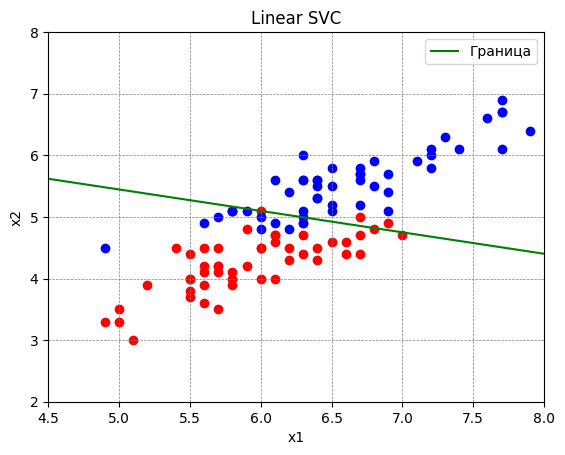

In [13]:
import numpy as np

data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

# здесь продолжайте программу
# обучающая выборка в формате [1, x1, x2]
x_train = np.array([[1] + list(x) for x in data_x]) # входные образы
y_train = np.array(data_y) # целевые значения (метки классов)
# Initialize weights (w_0, w_1, w_2)
# w_0 corresponds to the bias term
w = np.zeros(x_train.shape[1])

# Define hyperparameters
C = 1.0          # Regularization parameter
learning_rate = 0.001
epochs = 1000

# SGD training loop
for epoch in range(epochs):
    # Shuffle the training data for each epoch
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    x_shuffled = x_train[indices]
    y_shuffled = y_train[indices]

    for i in range(x_shuffled.shape[0]):
        xi = x_shuffled[i]
        yi = y_shuffled[i]

        # Calculate the functional margin
        functional_margin = yi * np.dot(w, xi)

        # Update rule based on the hinge loss gradient
        if functional_margin >= 1:
            # Correctly classified and outside the margin
            w[1:] = w[1:] - learning_rate * (C * w[1:]) # Only regularize non-bias terms
        else:
            # Misclassified or inside the margin
            w[1:] = w[1:] - learning_rate * (C * w[1:] - yi * xi[1:]) # Update non-bias terms
            w[0] = w[0] - learning_rate * (-yi * xi[0]) # Update bias term without regularization

# Prediction function
def predict_svm(X, weights):
    return np.sign(np.dot(X, weights))

# Make predictions on the training data
predictions = predict_svm(x_train, w)

# Calculate misclassification rate (Q)
Q = np.mean(predictions != y_train)

print(f"Trained weights (w): {w}")
print(f"Misclassification rate (Q): {Q}")
import matplotlib.pyplot as plt

# Отображаем точки данных
[plt.scatter(x[1], x[2], color='red', marker='o') for x in x_train[y_train == -1]]
[plt.scatter(x[1], x[2], color='blue', marker='o') for x in x_train[y_train == 1]]

# Определяем границы разделения для w
x_range = np.linspace(4, 8) # диапазон по оси x
y_range_w = -(w[1] * x_range + w[0]) / w[2] # уравнение разделяющей прямой для w

# Отображаем границы разделения
plt.plot(x_range, y_range_w, color='green', label='Граница')

# Настройки графика
plt.xlim(4.5, 8)
plt.ylim(2, 8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linear SVC')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0,color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

6


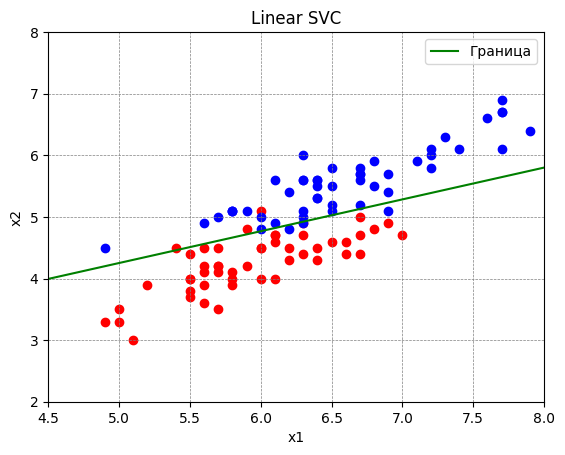

In [2]:
import numpy as np
from sklearn import svm

data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

# здесь продолжайте программу
# обучающая выборка в формате [1, x1, x2]
x_train = np.array([[1] + list(x) for x in data_x]) # входные образы
y_train = np.array(data_y) # целевые значения (метки классов)
model = svm.LinearSVC()
model.fit(x_train, y_train)
w = model.coef_[0]
w[0] *= w[2]
Y = y_train.reshape(-1,1)
predictions = np.sign(x_train @ w)
Q = np.sum(predictions != y_train)
print(Q)
# Визуализация данных и разделяющих прямых
import matplotlib.pyplot as plt

# Отображаем точки данных
[plt.scatter(x[1], x[2], color='red', marker='o') for x in x_train[y_train == -1]]
[plt.scatter(x[1], x[2], color='blue', marker='o') for x in x_train[y_train == 1]]

# Определяем границы разделения для w
x_range = np.linspace(4, 8) # диапазон по оси x
y_range_w = -(w[1] * x_range + w[0]) / w[2] # уравнение разделяющей прямой для w

# Отображаем границы разделения
plt.plot(x_range, y_range_w, color='green', label='Граница')

# Настройки графика
plt.xlim(4.5, 8)
plt.ylim(2, 8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Linear SVC')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0,color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()